In [1]:
%cd Utils

C:\Users\pasqu\Progetto_dataset_adult\Utils


*Importiamo le librerie necessarie*

In [2]:
#Librerie DS
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np

#Grafici
import matplotlib.pyplot as plt 
import seaborn as sns 

#Librerie proprie
from Import_e_info import *
from Analisi_variabili import *


#### Importiamo il dataset
Possiamo decidere di importare:
* il dataset costruito con missing values proporzionali (02.Trattamento_dati_mancanti)   
* il dataset che imputa la categoria disoccupati (02.Trattamento_dati_mancanti_alternativo)

 Noi scegliamo il secondo

In [3]:
dataset = pd.read_csv("../Datasets/dataset_concat_disocc")
#dataset = pd.read_csv("../dataset_no_mv")
dataset.drop(dataset.columns[0],axis = 1, inplace = True)

In [4]:
dataset

,Age,Tipo_lavoro,fnlwgt,Istruzione,Anni_istruzione,Stato_sociale,Condizione_familiare,Etnia,Genere,Cap_guadagnato,Cap_perso,Ore_settimanali,Reddito,Paese_Nativo_cat
0,39,State-gov,77516,Bachelors,13,Never-married,Not-in-family,White,Male,2174,0,40,<=50K,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Husband,White,Male,0,0,13,<=50K,United-States
2,38,Private,215646,HS-grad,9,Divorced,Not-in-family,White,Male,0,0,40,<=50K,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Husband,Black,Male,0,0,40,<=50K,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Wife,Black,Female,0,0,40,<=50K,No United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Wife,White,Female,0,0,38,<=50K,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Husband,White,Male,0,0,40,>50K,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Unmarried,White,Female,0,0,40,<=50K,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Own-child,White,Male,0,0,20,<=50K,United-States


**Analisi descrittiva e selezione variabili**

*Age*

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


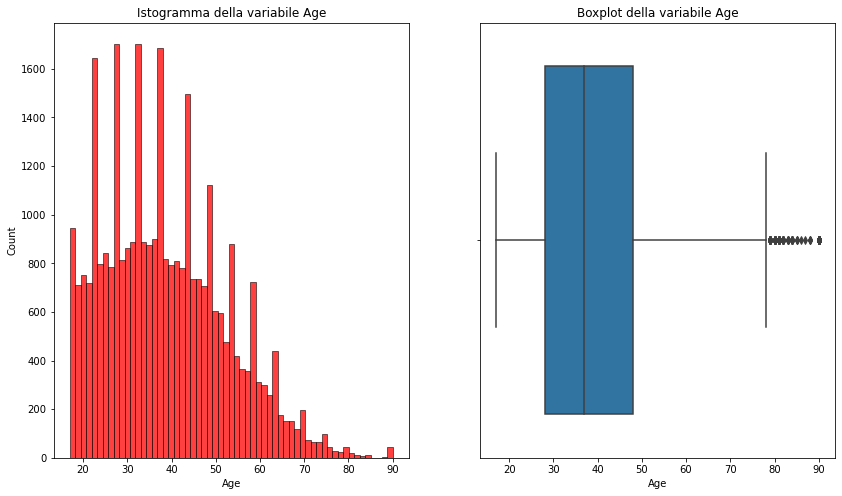

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Age, dtype: float64

In [5]:
descrizione = plot_var_num(dataset,"Age") 
descrizione

* Si evince l'asimmetria della distribuzione, che ci suggerisce come la maggior parte del campione
abbia un'età compresa tra i 30 e i 50 anni. 
* Dal boxplot, si nota la presenza di valori anomali Per coloro che hanno un'età maggiore agli 80 anni, testimonianza della bassa quantità di dati all'aumentare dell'età. 
* Proviamo ad osservare la distribuzione della stessa variabile in formato logaritmico

In [6]:
dataset["Age_log"] = np.log(dataset["Age"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


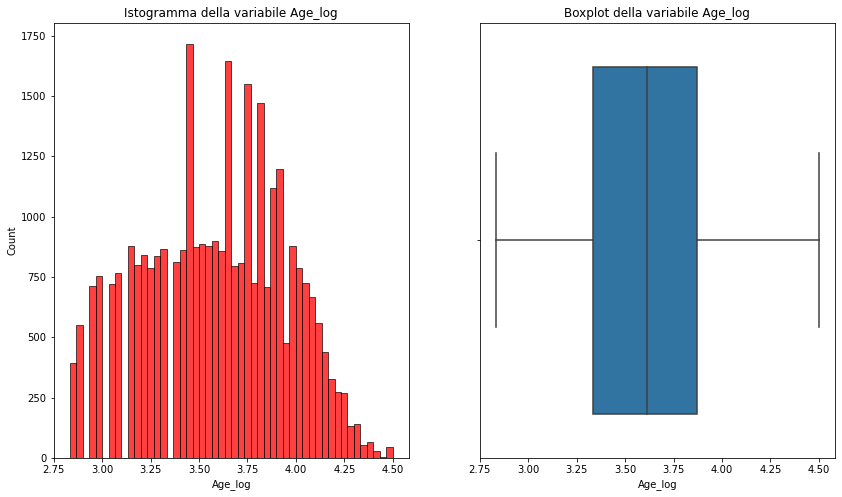

count    32561.000000
mean         3.589360
std          0.360379
min          2.833213
25%          3.332205
50%          3.610918
75%          3.871201
max          4.499810
Name: Age_log, dtype: float64

In [7]:
plot_var_num(dataset,"Age_log") 

* La trasformazione logaritmica rende la distribuzione maggiormente simmetrica, eliminando i valori anomali causati dalla natura del dataset

*Osserviamo se vi è dipendenza rispetto al target*


In [8]:
 dipendenza_correlazione(dataset, "Age_log","Reddito")

,correlation,p_value,sign_0.05
Kendall,0.225235,0.0,True


*Nonostante la correlazione abbastanza bassa, il p_value ci suggerisce di mantenere la variabile*

*Tipo_lavoro*

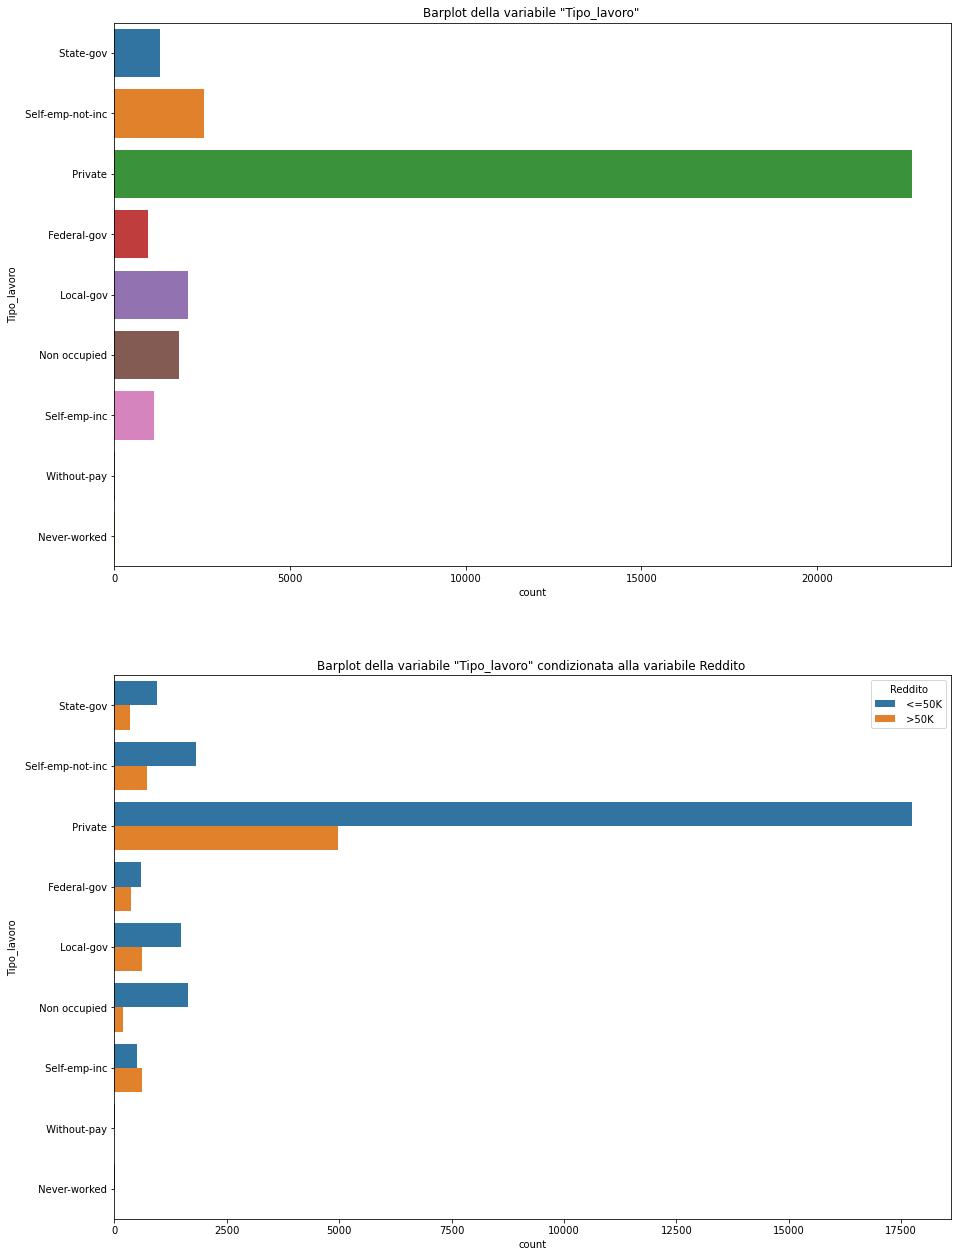

In [9]:
Tipo_lavoro, tabella_cont_tipo_lav = analisi_variabili_categoriche(dataset, "Tipo_lavoro","Reddito")

In [10]:
Tipo_lavoro

 Private             0.697030
 Self-emp-not-inc    0.078038
 Local-gov           0.064279
 Non occupied        0.056386
 State-gov           0.039864
 Self-emp-inc        0.034274
 Federal-gov         0.029483
 Without-pay         0.000430
 Never-worked        0.000215
Name: Tipo_lavoro, dtype: float64

In [11]:
if " Non occupied" in Tipo_lavoro.index :
    print(dataset[dataset["Tipo_lavoro"] == " Federal-gov"]["Reddito"].value_counts()/Tipo_lavoro[6])
    print(dataset[dataset["Tipo_lavoro"] == " State-gov"]["Reddito"].value_counts()/Tipo_lavoro[4])
    print(dataset[dataset["Tipo_lavoro"] == " Local-gov"]["Reddito"].value_counts()/Tipo_lavoro[2])
else:
    print(dataset[dataset["Tipo_lavoro"] == " Federal-gov"]["Reddito"].value_counts()/Tipo_lavoro[5])
    print(dataset[dataset["Tipo_lavoro"] == " State-gov"]["Reddito"].value_counts()/Tipo_lavoro[3])
    print(dataset[dataset["Tipo_lavoro"] == " Local-gov"]["Reddito"].value_counts()/Tipo_lavoro[2])
#Le ultime due hanno percentuali molto simili 

 <=50K    19977.530208
 >50K     12583.469792
Name: Reddito, dtype: float64
 <=50K    23705.812789
 >50K      8855.187211
Name: Reddito, dtype: float64
 <=50K    22962.272336
 >50K      9598.727664
Name: Reddito, dtype: float64


In [12]:
if " Non occupied" in Tipo_lavoro.index :
    print(dataset[dataset["Tipo_lavoro"] == " Self-emp-not-inc"]["Reddito"].value_counts()/Tipo_lavoro[1])
    print(dataset[dataset["Tipo_lavoro"] == " Self-emp-inc"]["Reddito"].value_counts()/Tipo_lavoro[5])
else:
    print(dataset[dataset["Tipo_lavoro"] == " Self-emp-not-inc"]["Reddito"].value_counts()/Tipo_lavoro[1])
    print(dataset[dataset["Tipo_lavoro"] == " Self-emp-inc"]["Reddito"].value_counts()/Tipo_lavoro[4])


 <=50K    23283.485636
 >50K      9277.514364
Name: Reddito, dtype: float64
 >50K     18147.797491
 <=50K    14413.202509
Name: Reddito, dtype: float64


In [13]:
if " Non occupied" in Tipo_lavoro.index :
    print(dataset[dataset["Tipo_lavoro"] == " Without-pay"]["Reddito"].value_counts()/Tipo_lavoro[7])
    print(dataset[dataset["Tipo_lavoro"] == " Never-worked"]["Reddito"].value_counts()/Tipo_lavoro[8])
else:
    print(dataset[dataset["Tipo_lavoro"] == " Without-pay"]["Reddito"].value_counts()/Tipo_lavoro[6])
    print(dataset[dataset["Tipo_lavoro"] == " Never-worked"]["Reddito"].value_counts()/Tipo_lavoro[7])

 <=50K    32561.0
Name: Reddito, dtype: float64
 <=50K    32561.0
Name: Reddito, dtype: float64


*Dalle informazioni qui sopra si osserva come la maggior parte delle osservazioni appartengano alla categoria Private.* 
*Applichiamo delle trasformiazioni alle categorie. In particolare:*
* *Unifichiamo le categorie "Local-gov","State-gov"*  
* *Unifichiamo le categorie "without-pay" e "Never-worked"*


In [14]:
dataset = unificazione_categorie(dataset, "Tipo_lavoro", [" Local-gov"," State-gov"], " governative")
dataset = unificazione_categorie(dataset, "Tipo_lavoro", [" Without-pay"," Never-worked"], " Non occupied")

In [15]:
dataset.Tipo_lavoro.value_counts()

 Private             22696
 governative          3391
 Self-emp-not-inc     2541
 Non occupied         1857
 Self-emp-inc         1116
 Federal-gov           960
Name: Tipo_lavoro, dtype: int64

*Osserviamo l'associazione rispetto al target*

In [16]:
dipendenza_correlazione(dataset, "Reddito","Tipo_lavoro") #Significativo

,p_value,sign_0.05
chi2,4.398929e-223,True


*fnlwgt* 

*La variabile fnlwgt esprime il peso da attribuire a ciascuna osservazioni secondo parametri basate sulle variabili socio-demograficìhe. Siccome non sappiamo ulteriori informazioni, decidiamo di cancellare tale variabile*

In [17]:
dataset.drop("fnlwgt",axis = 1, inplace = True)

*Istruzione e Anni_istruzione*

In [18]:
dataset.Istruzione.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Istruzione, dtype: int64

In [19]:
pd.crosstab(dataset.Istruzione, dataset.Anni_istruzione)

Anni_istruzione,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Istruzione,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,933,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1175,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,433,0,0,0,0,0,0,0,0
1st-4th,0,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,333,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,646,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,514,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1067,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,1382,0,0,0,0,0


*Dalla tabella di contingenza si evince che le due variabili esprimono le stesse informazioni, per cui possiamo scegliere una delle due* 

In [20]:
dataset.drop("Anni_istruzione", axis = 1, inplace = True)

*Trasformiamo la variabile Istruzione in Ordinal_encoding*

In [21]:
Anni = CategoricalDtype(categories = [' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',
' 11th',' 12th',' HS-grad',' Some-college',' Assoc-voc',' Assoc-acdm',
' Prof-school',' Bachelors',' Masters',' Doctorate'], ordered = True)
dataset["Istruzione"] = dataset["Istruzione"].astype(Anni)

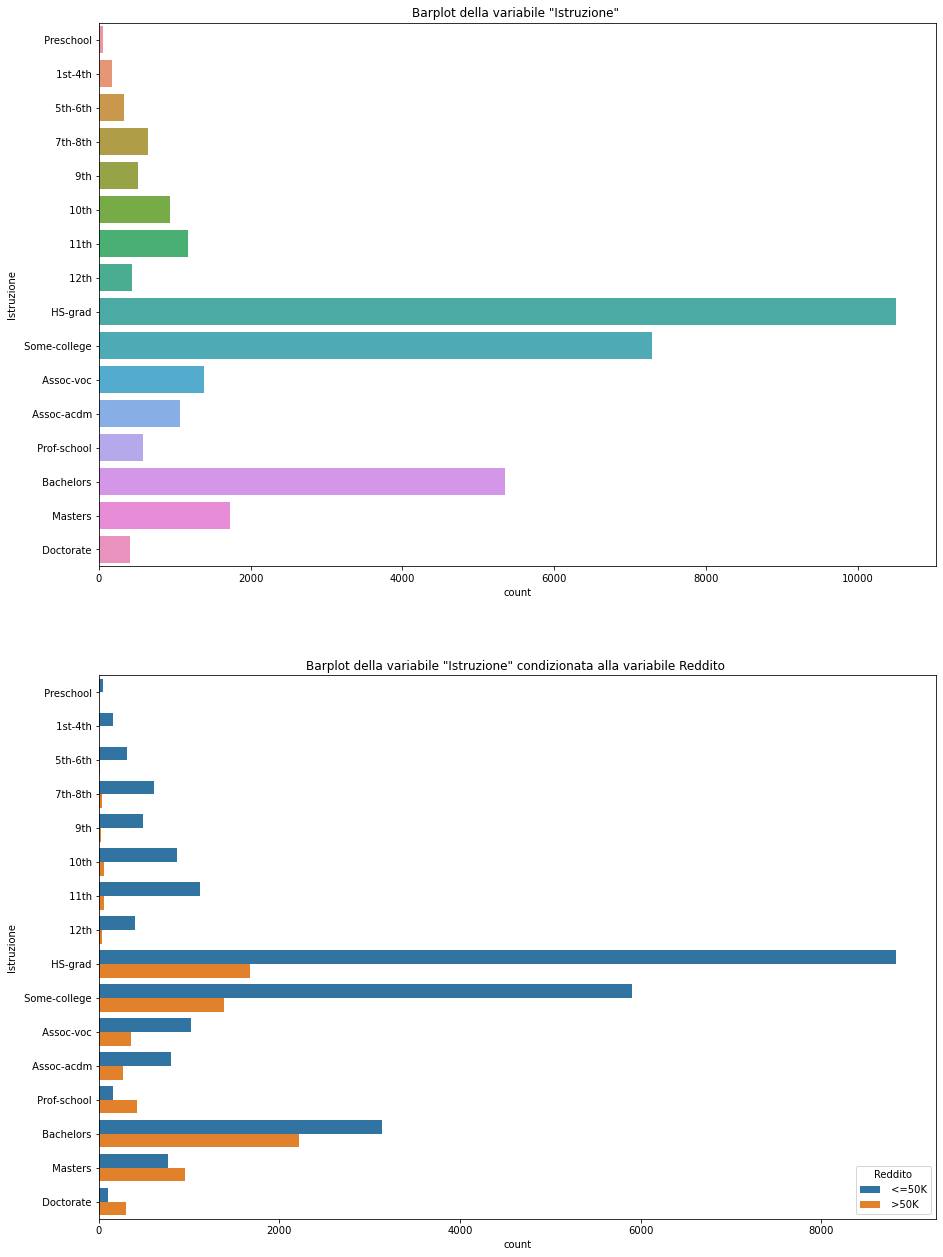

In [22]:
Istruzione, tabella_cont_ist = analisi_variabili_categoriche(dataset,"Istruzione", "Reddito")

In [23]:
Istruzione

 HS-grad         0.322502
 Some-college    0.223918
 Bachelors       0.164461
 Masters         0.052916
 Assoc-voc       0.042443
 11th            0.036086
 Assoc-acdm      0.032769
 10th            0.028654
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013298
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: Istruzione, dtype: float64

*Dai grafici e dalla tabella si osserva come:* 
* La maggior parte del campione abbia un diploma (32% circa)
* La percentuale di laureati è maggiore della somma delle percentuali di coloro che non abbiano nemmeno un diploma
* All'aumentare del grado del titolo di studio, aumenta la percentuale di individui che posseggono un reddito maggiore di 50k
* Sono pochissimi gli individui che non abbiano conseguito almeno un diploma e che posseggono un reddito maggiore di 50k

In [24]:
tabella_cont_ist

Reddito,<=50K,>50K
Istruzione,,
Preschool,1.000000,0.000000
1st-4th,0.964286,0.035714
5th-6th,0.951952,0.048048
7th-8th,0.938080,0.061920
9th,0.947471,0.052529
10th,0.933548,0.066452
11th,0.948936,0.051064
12th,0.923788,0.076212
HS-grad,0.840491,0.159509


*Date le percentuali molto simili, unifichiamo tutte le categorie antecedenti a quelle del diploma*

In [25]:
da_sostituire = [" Preschool", " 1st-4th", " 5th-6th", 
                " 7th-8th"," 9th"," 10th"," 11th"," 12th"]
dataset.replace(da_sostituire, " No-Diploma", inplace = True)

In [26]:
dipendenza_correlazione(dataset,"Istruzione","Reddito") #Manteniamo

,correlation,p_value,sign_0.05
Kendall,-0.108618,3.842875e-107,True


*Stato sociale*

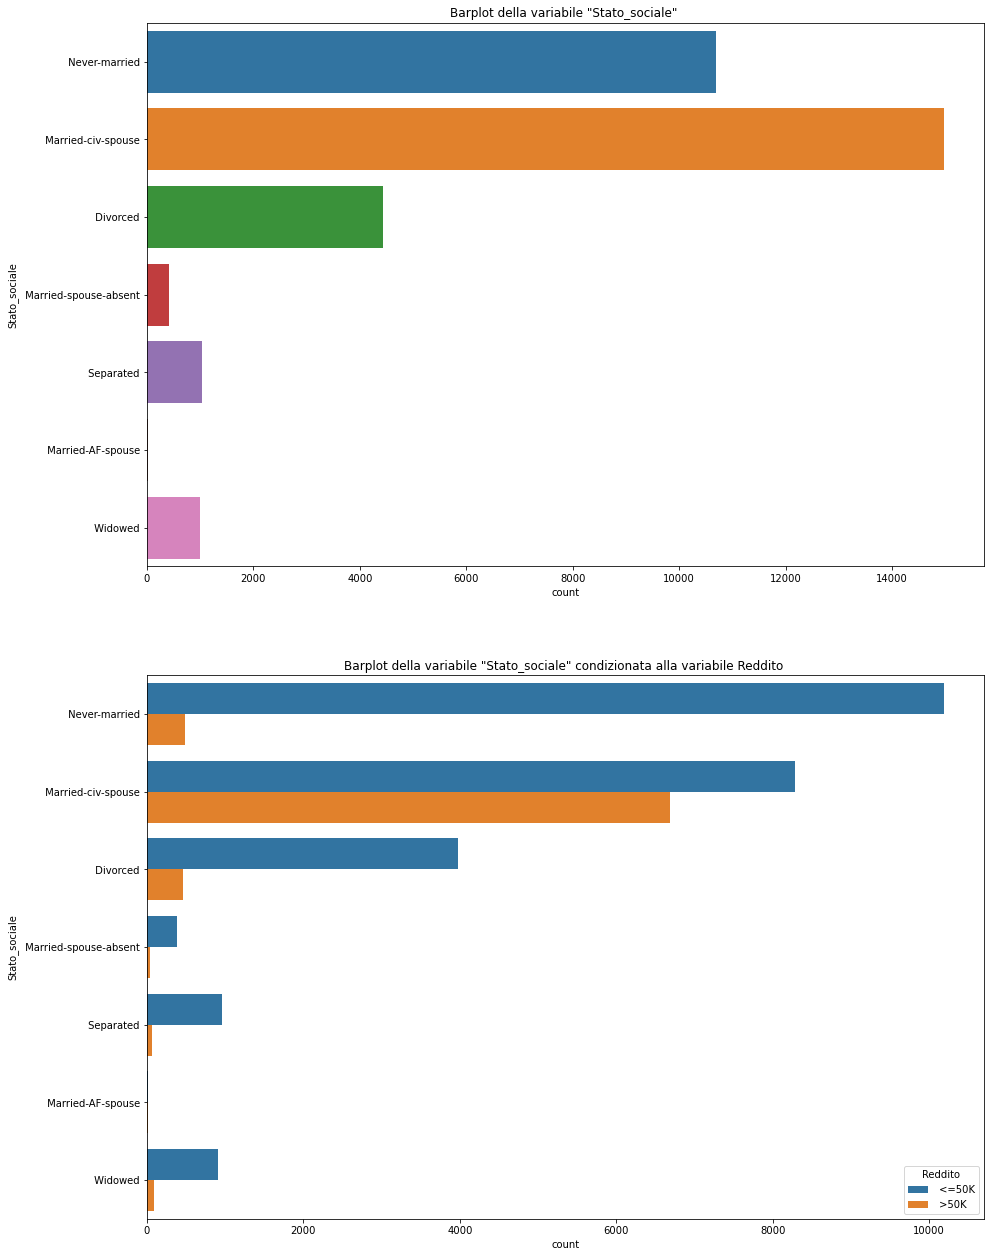

In [27]:
Stato_sociale, tabella_cont_Stato_soc = analisi_variabili_categoriche(dataset, "Stato_sociale","Reddito")

In [28]:
Stato_sociale, tabella_cont_Stato_soc

( Married-civ-spouse       0.459937
  Never-married            0.328092
  Divorced                 0.136452
  Separated                0.031479
  Widowed                  0.030497
  Married-spouse-absent    0.012837
  Married-AF-spouse        0.000706
 Name: Stato_sociale, dtype: float64,
 Reddito                    <=50K      >50K
 Stato_sociale                             
  Divorced               0.895791  0.104209
  Married-AF-spouse      0.565217  0.434783
  Married-civ-spouse     0.553152  0.446848
  Married-spouse-absent  0.918660  0.081340
  Never-married          0.954039  0.045961
  Separated              0.935610  0.064390
  Widowed                0.914401  0.085599)

*Dall'analisi si evince:* 
* Il 46% del campione risulta sposato civilmente, mentre solo lo 0.7% è sposato nelle forze armate
* La percentuale di osservazioni che presenta un reddito maggiore di 50k è molto simile per coloro che risultano separati e chi risulta mai sposato 

*Si procederà:*
* Unificazione delle categorie "Married-AF-spouse", "Married-civ-spouse" con la categoria "married" 
* Unificazione delle categorie "Never-Married", "Separated" con la categoria "No relation" 

In [29]:
dataset = unificazione_categorie(dataset,"Stato_sociale",[" Married-AF-spouse", " Married-civ-spouse"],
                                " Married")
dataset = unificazione_categorie(dataset,"Stato_sociale",[" Never-married", " Separated"],
                                " No-relation")


*Osserviamo la dipendenza rispetto al target*

In [30]:
dipendenza_correlazione(dataset,"Reddito","Stato_sociale") #Significativo, per cui la teniamo

,p_value,sign_0.05
chi2,0.0,True


*Condizione_familiare*


In [31]:
pd.crosstab(dataset.Stato_sociale, dataset.Condizione_familiare)

Condizione_familiare,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
Stato_sociale,,,,,,
Divorced,0,2404,110,328,1601,0
Married,13193,17,125,96,0,1568
Married-spouse-absent,0,211,32,45,130,0
No-relation,0,5126,666,4584,1332,0
Widowed,0,547,48,15,383,0


In [32]:
dipendenza_correlazione(dataset, "Reddito", "Condizione_familiare", p_value_lv = 0.01)
#Il test suggerisce di mantenere la variabile

,p_value,sign_0.01
chi2,0.0,True


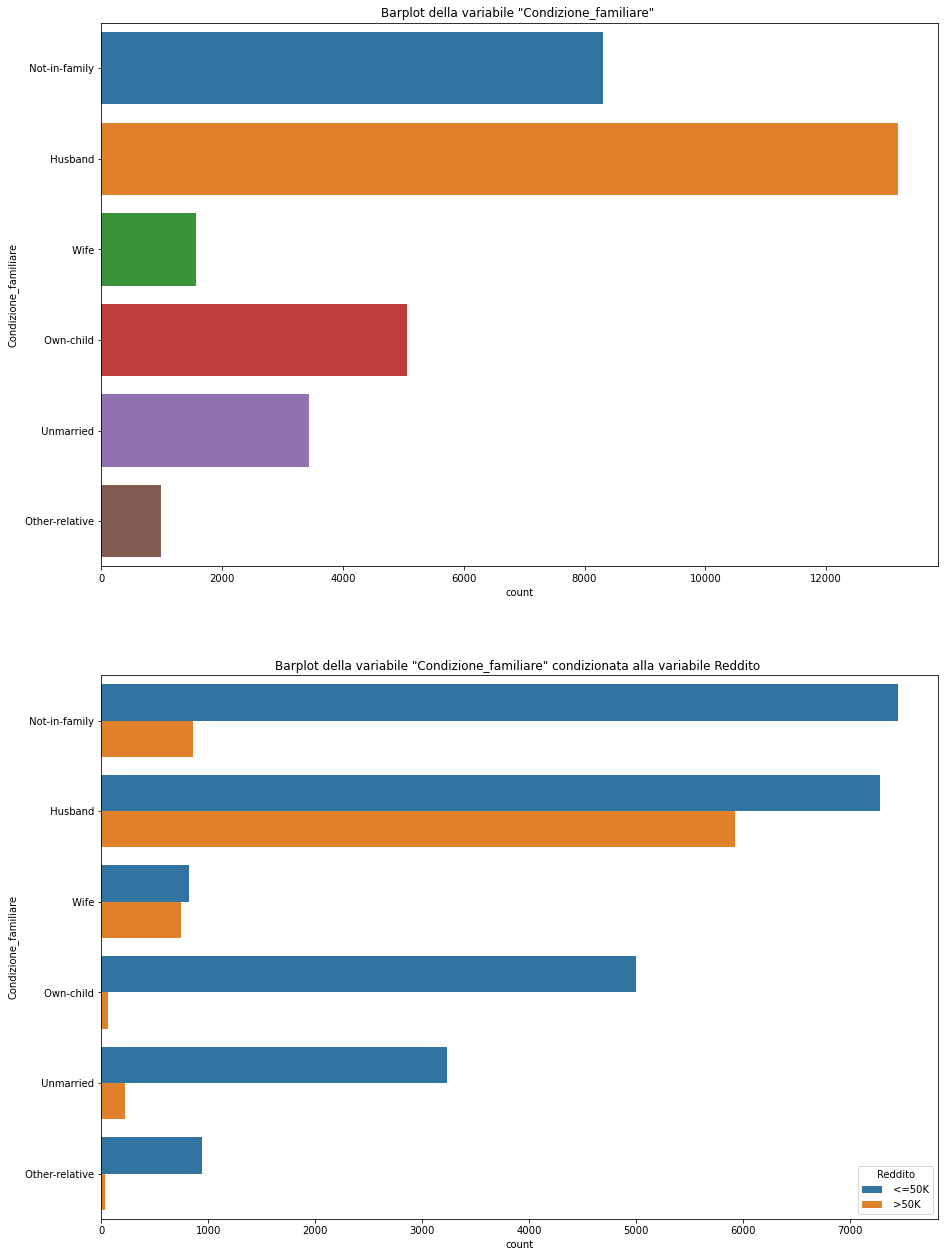

In [33]:
Condizione_familiare, tabella_cont_cond = analisi_variabili_categoriche(dataset, "Condizione_familiare",
                                                                       "Reddito")

In [34]:
Condizione_familiare, tabella_cont_cond

( Husband           0.405178
  Not-in-family     0.255060
  Own-child         0.155646
  Unmarried         0.105832
  Wife              0.048156
  Other-relative    0.030128
 Name: Condizione_familiare, dtype: float64,
 Reddito                  <=50K      >50K
 Condizione_familiare                    
  Husband              0.551429  0.448571
  Not-in-family        0.896930  0.103070
  Other-relative       0.962283  0.037717
  Own-child            0.986780  0.013220
  Unmarried            0.936738  0.063262
  Wife                 0.524872  0.475128)

*Dall'analisi si evince:*
* Il 40% del campione è un marito
* Si osservano simili percentuali in merito al reddito per "wife" e "husband"

*Si decide:*
* Unificazione della categoria "Husband" e "Wife" con la categoria "Husband-Wife"



In [35]:
dataset = unificazione_categorie(dataset, "Condizione_familiare",[" Husband", " Wife"], " Husband-Wife" )

*La variabile "Condizione_familiare" resistuisce delle informazioni molto similii alla variabile "Stato sociale". Osservando il test del chiquadro otteniamo una dipendenza significativa. Decidiamo quindi di eliminare tale variabile* 

In [36]:
dipendenza_correlazione(dataset, "Condizione_familiare", "Stato_sociale")

,p_value,sign_0.05
chi2,0.0,True


In [37]:
dataset.drop("Condizione_familiare", axis = 1, inplace = True)

In [38]:
dataset

,Age,Tipo_lavoro,Istruzione,Stato_sociale,Etnia,Genere,Cap_guadagnato,Cap_perso,Ore_settimanali,Reddito,Paese_Nativo_cat,Age_log
0,39,governative,Bachelors,No-relation,White,Male,2174,0,40,<=50K,United-States,3.663562
1,50,Self-emp-not-inc,Bachelors,Married,White,Male,0,0,13,<=50K,United-States,3.912023
2,38,Private,HS-grad,Divorced,White,Male,0,0,40,<=50K,United-States,3.637586
3,53,Private,No-Diploma,Married,Black,Male,0,0,40,<=50K,United-States,3.970292
4,28,Private,Bachelors,Married,Black,Female,0,0,40,<=50K,No United-States,3.332205
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married,White,Female,0,0,38,<=50K,United-States,3.295837
32557,40,Private,HS-grad,Married,White,Male,0,0,40,>50K,United-States,3.688879
32558,58,Private,HS-grad,Widowed,White,Female,0,0,40,<=50K,United-States,4.060443
32559,22,Private,HS-grad,No-relation,White,Male,0,0,20,<=50K,United-States,3.091042


*Etnia*

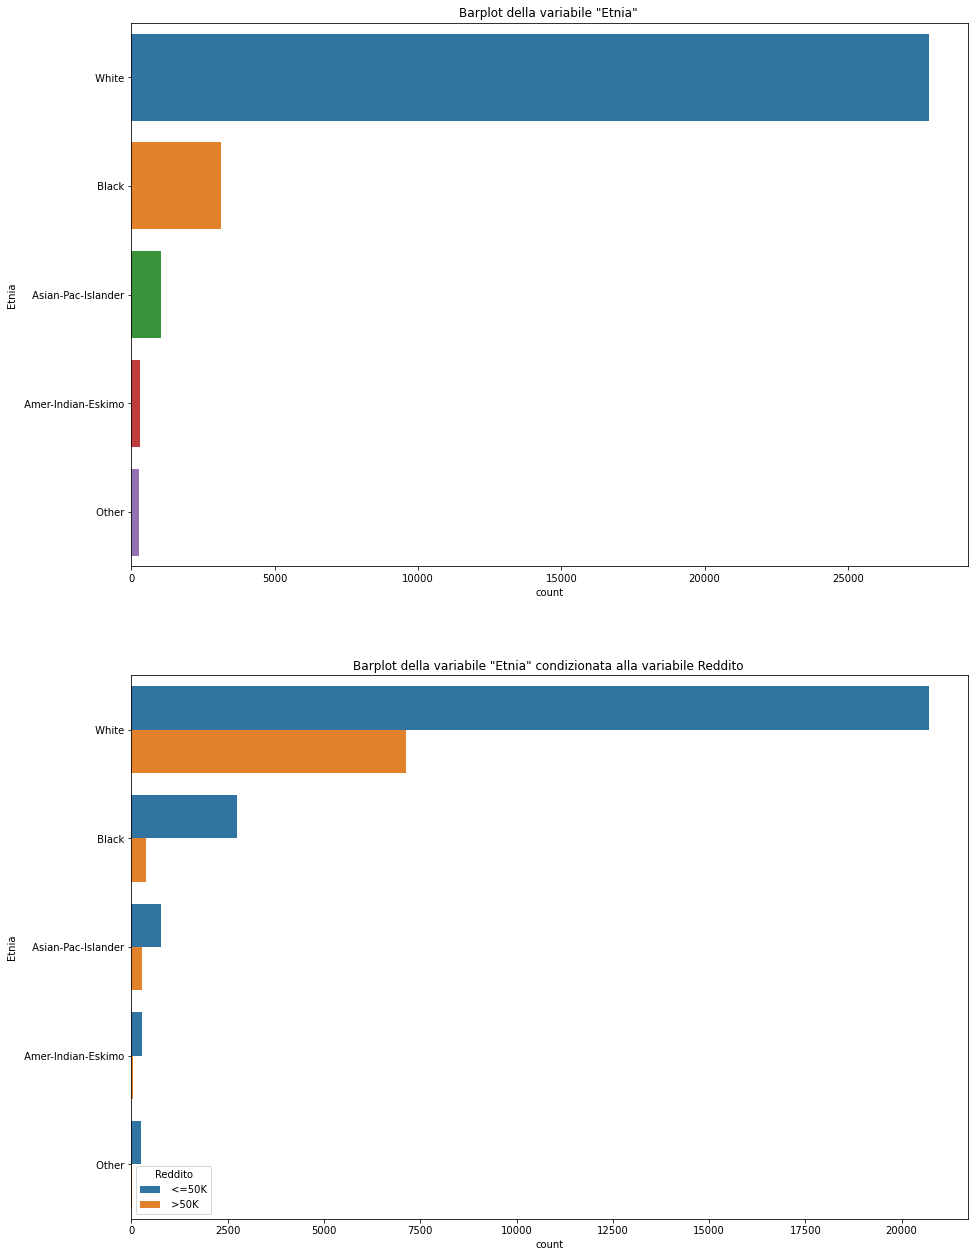

In [39]:
Etnia, tabella_cont_etnia = analisi_variabili_categoriche(dataset, "Etnia","Reddito")

In [40]:
Etnia, tabella_cont_etnia

( White                 0.854274
  Black                 0.095943
  Asian-Pac-Islander    0.031909
  Amer-Indian-Eskimo    0.009551
  Other                 0.008323
 Name: Etnia, dtype: float64,
 Reddito                 <=50K      >50K
 Etnia                                  
  Amer-Indian-Eskimo  0.884244  0.115756
  Asian-Pac-Islander  0.734360  0.265640
  Black               0.876120  0.123880
  Other               0.907749  0.092251
  White               0.744140  0.255860)

In [41]:
dipendenza_correlazione(dataset, "Etnia","Reddito", p_value_lv = 0.01)

,p_value,sign_0.01
chi2,2.305961e-70,True


*Dall'analisi si evince:*
* L'85% della popolazione è bianca, residuali le altre etnie

*Procediamo:*
* Accorpando la categoria Amer-Indian-Eskimo con la categoria "Other", poichè presentano una percentuale molto residuale dell'intero dataset.  

In [42]:
dataset = unificazione_categorie(dataset, "Etnia", [" Amer-Indian-Eskimo"], " Other")

*Genere*

In [43]:
dipendenza_correlazione(dataset, "Genere","Reddito") #Rifiutiamo ipotesi di dipendenza 

,p_value,sign_0.05
chi2,0.0,True


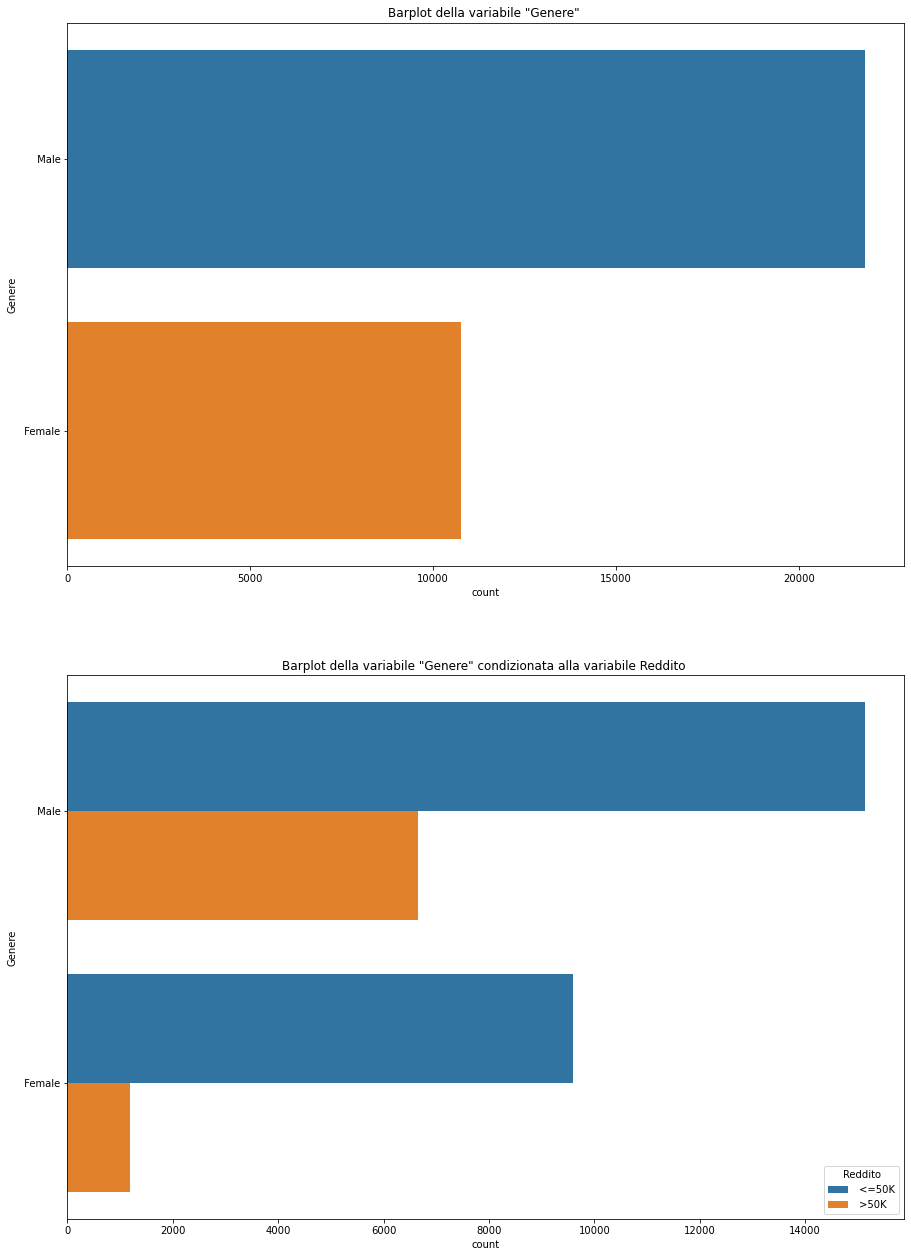

In [44]:
Genere, tabella_cont_gen = analisi_variabili_categoriche(dataset, "Genere","Reddito")

In [45]:
Genere

 Male      0.669205
 Female    0.330795
Name: Genere, dtype: float64

In [46]:
tabella_cont_gen

Reddito,<=50K,>50K
Genere,,
Female,0.890539,0.109461
Male,0.694263,0.305737


*Dall'analisi si osserva:*
* Il 66% del dataset è maschio
* Discriminazione di genere: solo l'11 % del campione femminile presenta un reddito maggiore di 50k, tale percentuale sale al 30% se consideriamo gli uomini

*Cap_guadagnato e Cap_perso*

*Sono due variabili legate, poichè esprimono la quantità di capitale guadagnata o perso da ciascuna osservazione*

*Trattamento: le uniamo fornendo un'unico valore dal nome "Capitale_totale"*

In [47]:
dataset["Capitale_totale"] = dataset["Cap_guadagnato"] - dataset["Cap_perso"]

In [48]:
dataset.drop(["Cap_guadagnato","Cap_perso"], axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


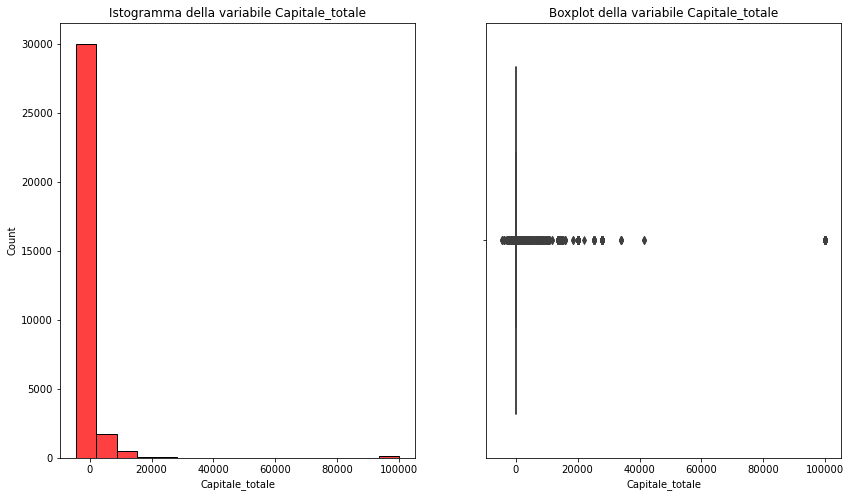

In [49]:
Capitale = plot_var_num(dataset, "Capitale_totale")

In [50]:
dataset[dataset["Capitale_totale"] < 0 ]["Reddito"].value_counts()

 >50K     773
 <=50K    746
Name: Reddito, dtype: int64

In [51]:
dataset[dataset["Capitale_totale"] == 0 ]["Reddito"].value_counts()

 <=50K    22939
 >50K      5391
Name: Reddito, dtype: int64

In [52]:
dataset[dataset["Capitale_totale"] > 0 ]["Reddito"].value_counts()

 >50K     1677
 <=50K    1035
Name: Reddito, dtype: int64

*Dall'analisi si evince come la maggior parte della popolazione abbia un capitale pari a 0. Inoltre, per coloro che posseggono un capitale guadagnato o capitale perso, non si osserva un'informazione aggiuntiva in merito alle possibilità che il reddito sia maggiore o minore di 50k. Procediamo quindi alla cancellazione della variabile*

In [53]:
dataset.drop("Capitale_totale", axis = 1, inplace = True)

In [54]:
dataset

,Age,Tipo_lavoro,Istruzione,Stato_sociale,Etnia,Genere,Ore_settimanali,Reddito,Paese_Nativo_cat,Age_log
0,39,governative,Bachelors,No-relation,White,Male,40,<=50K,United-States,3.663562
1,50,Self-emp-not-inc,Bachelors,Married,White,Male,13,<=50K,United-States,3.912023
2,38,Private,HS-grad,Divorced,White,Male,40,<=50K,United-States,3.637586
3,53,Private,No-Diploma,Married,Black,Male,40,<=50K,United-States,3.970292
4,28,Private,Bachelors,Married,Black,Female,40,<=50K,No United-States,3.332205
...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married,White,Female,38,<=50K,United-States,3.295837
32557,40,Private,HS-grad,Married,White,Male,40,>50K,United-States,3.688879
32558,58,Private,HS-grad,Widowed,White,Female,40,<=50K,United-States,4.060443
32559,22,Private,HS-grad,No-relation,White,Male,20,<=50K,United-States,3.091042


*Ore settimanali*

In [55]:
dipendenza_correlazione(dataset,"Ore_settimanali","Reddito")

,correlation,p_value,sign_0.05
Kendall,0.238273,0.0,True


*Nonostante il test sia significativo, il coefficiente di correlazione è abbastanza basso. Osserviamo più da vicino.*

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


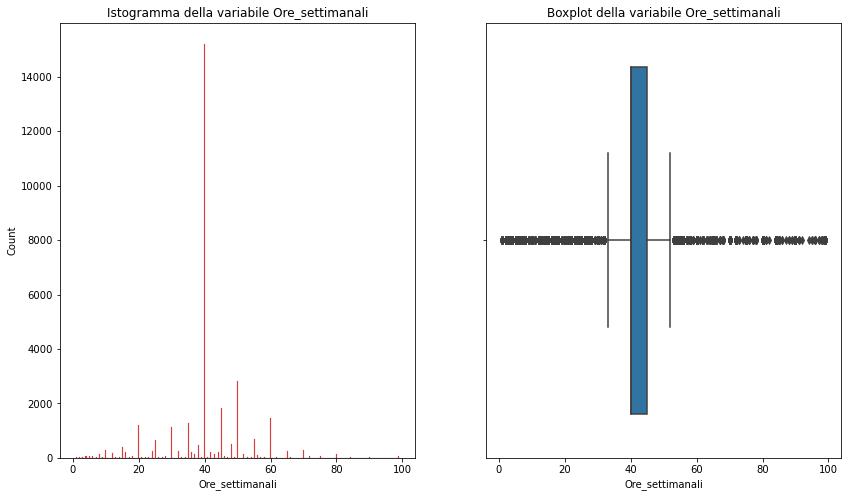

In [56]:
Ore = plot_var_num(dataset, "Ore_settimanali")

In [57]:
Ore

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: Ore_settimanali, dtype: float64

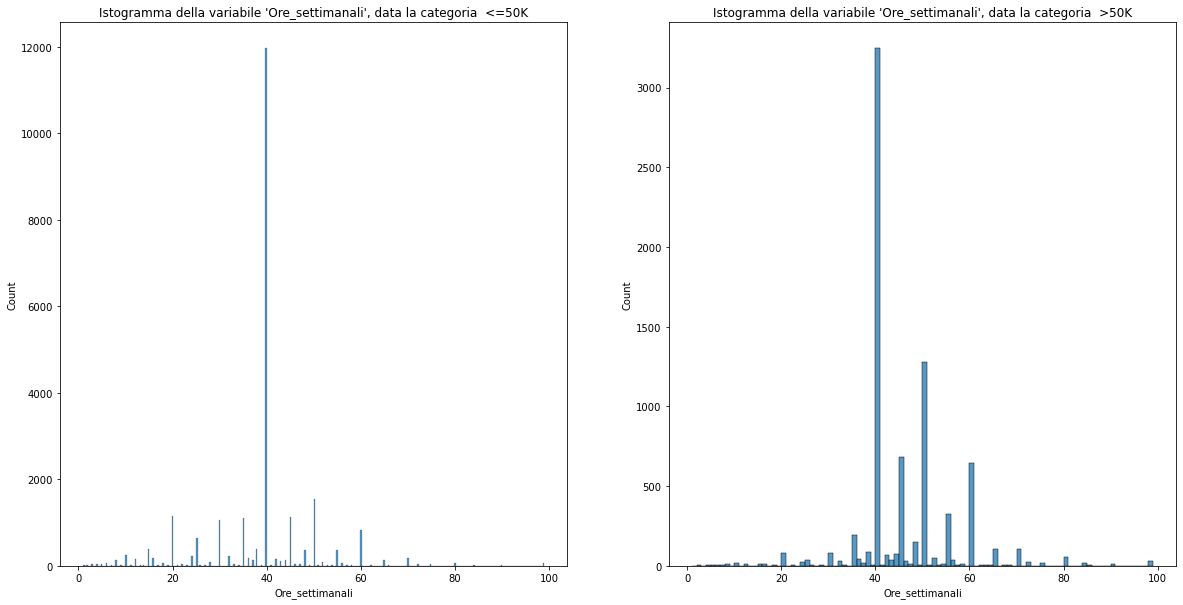

In [58]:
histplot_1_per_categorie(dataset,'Ore_settimanali', 'Reddito',1,2)

*Dai grafici si osserva:*
* La presenza strana di outliers per i quali il numero di ore settimanali risulti essere maggiore di 70 ore (che equivarrebbe a 14 ore settimanali se la settimana lavorativa fosse di 5 giorni di 10 se fosse uguale 10).
* Dall'istogramma delle osservazioni suddivise per coloro che hanno un reddito diverso, la distribuzione è molto simile, sintomo di non discriminazione causata dalla quantità di ore lavorative.
* Si decide di eliminare la variabile 

In [59]:
dataset.drop("Ore_settimanali", axis = 1, inplace = True)

*Paese_Nativo_cat*

In [60]:
dipendenza_correlazione(dataset,"Reddito","Paese_Nativo_cat") #Statisticamente significativo 

,p_value,sign_0.05
chi2,4.705929e-12,True


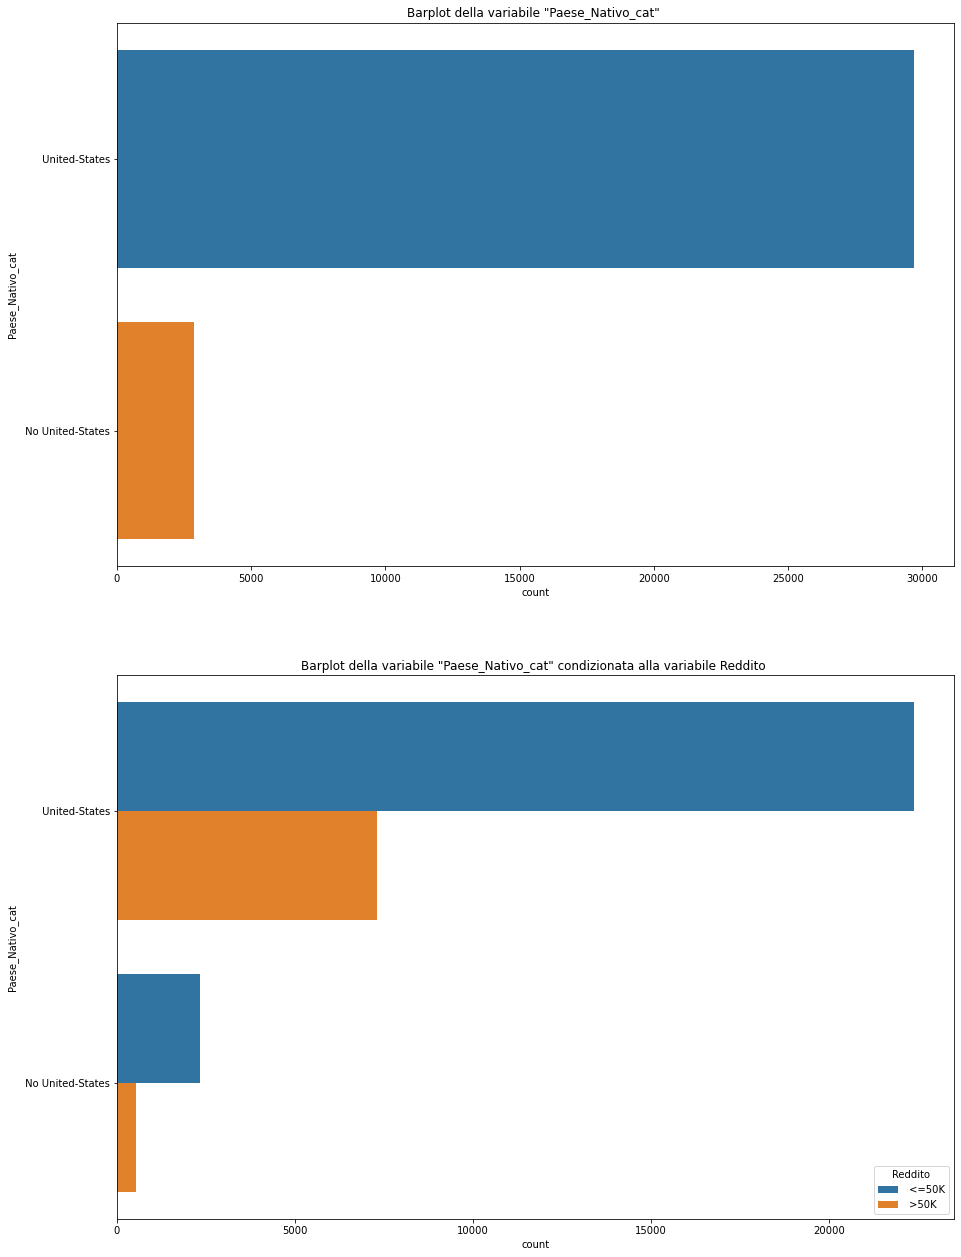

In [61]:
Paese_nativo, tabella_cont_Pn = analisi_variabili_categoriche(dataset,"Paese_Nativo_cat","Reddito" )

In [62]:
Paese_nativo, tabella_cont_Pn

( United-States       0.912196
  No United-States    0.087804
 Name: Paese_Nativo_cat, dtype: float64,
 Reddito               <=50K      >50K
 Paese_Nativo_cat                     
  No United-States  0.812172  0.187828
  United-States     0.754091  0.245909)

*Dall'analisi si osserva:* 
* La grande prevalenza di origini statunitensi (circa il 91%)
* Minima discriminazione: una maggiore probabilità di avere un reddito maggiore di 50K se la propria origine è statunitense

In [63]:
dipendenza_correlazione(dataset, "Stato_sociale","Paese_Nativo_cat")

,p_value,sign_0.05
chi2,1.443052e-90,True


In [64]:
dataset

,Age,Tipo_lavoro,Istruzione,Stato_sociale,Etnia,Genere,Reddito,Paese_Nativo_cat,Age_log
0,39,governative,Bachelors,No-relation,White,Male,<=50K,United-States,3.663562
1,50,Self-emp-not-inc,Bachelors,Married,White,Male,<=50K,United-States,3.912023
2,38,Private,HS-grad,Divorced,White,Male,<=50K,United-States,3.637586
3,53,Private,No-Diploma,Married,Black,Male,<=50K,United-States,3.970292
4,28,Private,Bachelors,Married,Black,Female,<=50K,No United-States,3.332205
...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married,White,Female,<=50K,United-States,3.295837
32557,40,Private,HS-grad,Married,White,Male,>50K,United-States,3.688879
32558,58,Private,HS-grad,Widowed,White,Female,<=50K,United-States,4.060443
32559,22,Private,HS-grad,No-relation,White,Male,<=50K,United-States,3.091042


 <=50K    0.75919
 >50K     0.24081
Name: Reddito, dtype: float64

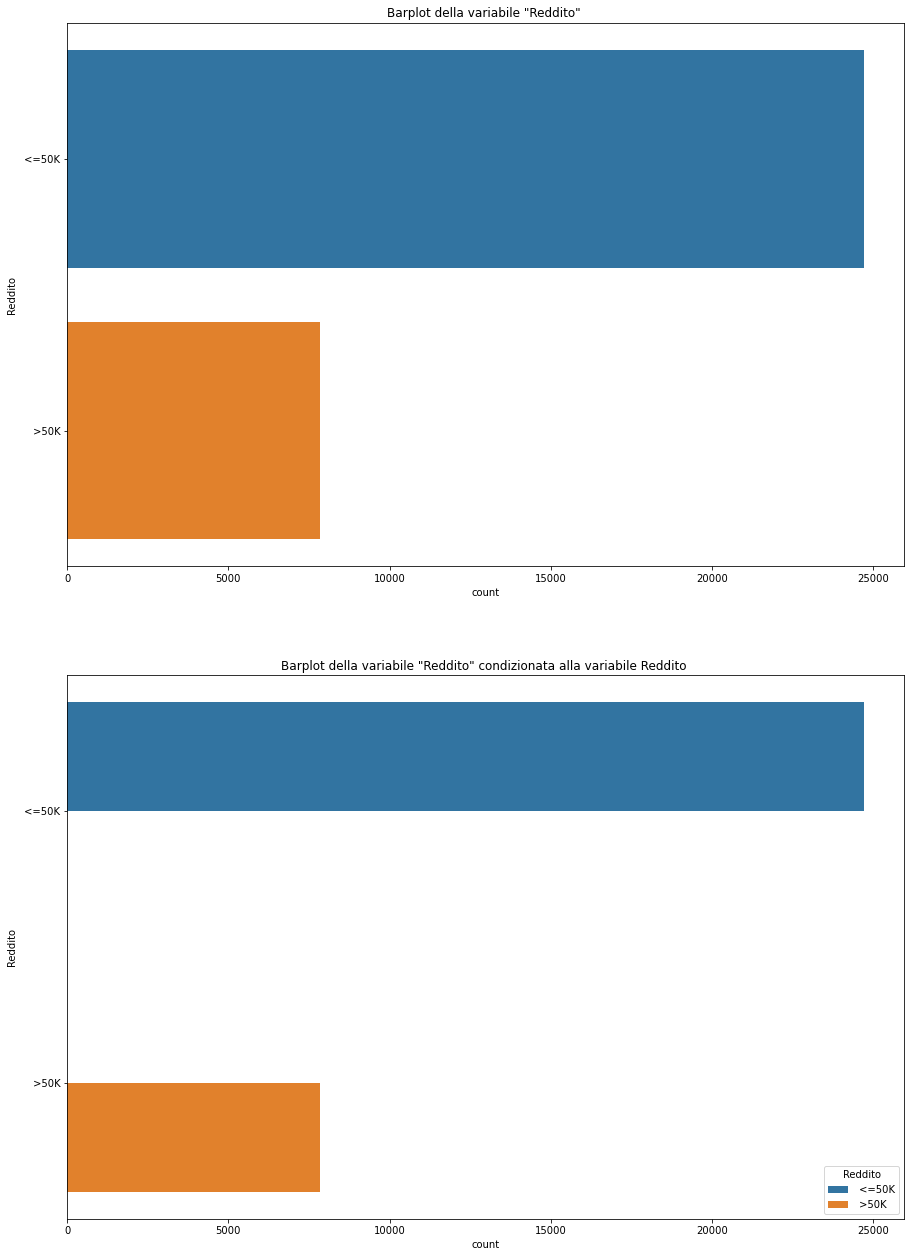

In [65]:
Reddito, tabella_cont = analisi_variabili_categoriche(dataset, "Reddito","Reddito")
Reddito

*Dall'analisi si evince che il dataset non è bilanciato: Difatti il 75% del campione ha un reddito inferiore ai 50k annuali*

*Alla fine dell'analisi descrittiva, decidiamo di considerare considerando le seguenti variabili:* 
* Tipo_lavoro
* Istruzione
* Stato_sociale	
* Etnia
* Genere
* Paese_Nativo_cat
* Age_log


*Sono quindi state eliminate le seguenti variabili*:
* Condizione_familiare
* fnlwgt
* Anni_istruzione
* Cap_guadagnato
* Cap_perso
* Ore_settimanali


In [66]:
dataset.drop("Age",axis = 1, inplace=True)

*Salviamo il dataset*

In [67]:
#%cd ../Datasets
#dataset.to_csv("dataset_dopo_descrit")

C:\Users\pasqu\Progetto_dataset_adult\Datasets
